In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
msg = pd.read_csv('train.csv', encoding='latin-1')
msg

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [3]:
msg.nunique()

User_ID         38932
Description     38932
Browser_Used       11
Device_Used         3
Is_Response         2
dtype: int64

In [4]:
msg['Browser_Used'].unique()

array(['Edge', 'Internet Explorer', 'Mozilla', 'InternetExplorer',
       'Firefox', 'Google Chrome', 'Chrome', 'IE', 'Opera',
       'Mozilla Firefox', 'Safari'], dtype=object)

In [5]:
msg['Browser_Used'].replace({'InternetExplorer':'Internet Explorer', 'IE':'Internet Explorer', 'Chrome':'Google Chrome',
                            'Mozilla':'Mozilla Firefox', 'Firefox':'Mozilla Firefox'}, inplace=True)
msg['Browser_Used'].unique()

array(['Edge', 'Internet Explorer', 'Mozilla Firefox', 'Google Chrome',
       'Opera', 'Safari'], dtype=object)

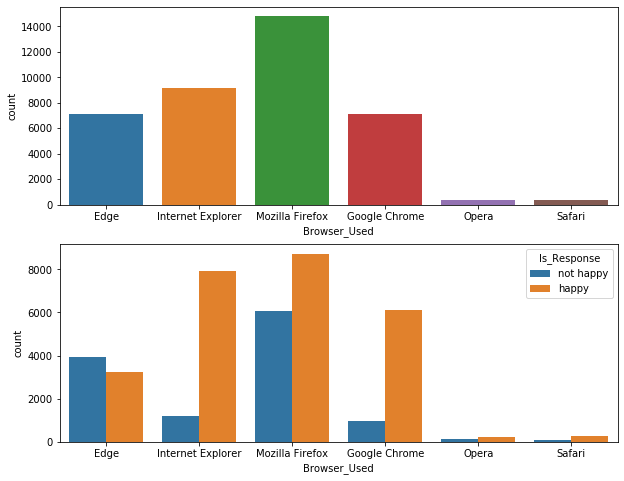

In [6]:
f, ax = plt.subplots(2,1,figsize=(10,8))
sns.countplot('Browser_Used', data=msg, ax=ax[0])
sns.countplot('Browser_Used', data=msg, hue='Is_Response')

Observations:
    1. Majority of reviews are from users with Mozilla Firefox.
    2. Majority of Google Chrome and IE users are satisfied with the hotel.
    3. Edge users are mostly not happy with the service from the hotel.

In [7]:
msg.Is_Response.value_counts()

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [8]:
print('Happy Ratio ::', round(len(msg[msg['Is_Response']=='happy'])/len(msg['Is_Response']),2)*100,'%')
print('Not_Happy Ratio ::', round(len(msg[msg['Is_Response']=='not happy'])/len(msg['Is_Response']),2)*100,'%')

Happy Ratio :: 68.0 %
Not_Happy Ratio :: 32.0 %


In [25]:
msg['length']=msg.Description.str.len()
sorted(msg['length'].unique())[-5:]

[9715, 10429, 10469, 11037, 14340]